# Predicting Iris Class 
The Iris dataset was created by statistician and biologist, Ronald Fisher, in 1936 and published in his paper titled, "The use of multiple measuerments in taxonomic problems". This dataset has been used as a classic statistical learning toy dataset for pattern recognition and  is used from the SciKit learn implementation described at the following URL: 
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


Data description: 
There are 150 entries for each class with  four features measuring the petal and sepal length and widths.

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Target - This dataset consists of 3 different target Iris classes; Setosa, Versicolour and Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# instantiate the dataset loader
data = load_iris()

# create a list of column names
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

# convert iris data object into pandas dataframe
df = pd.DataFrame(data= np.c_[data.data, data.target], columns=cols)

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Data Munging


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null float64
dtypes: float64(5)
memory usage: 6.0 KB


No missing values found. 

### Exploratory Data Analysis

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002110F755988>,
      dtype=object)

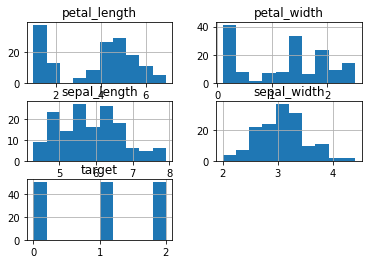

In [7]:
df.hist()

Sepal width has nearly symmetric distribution

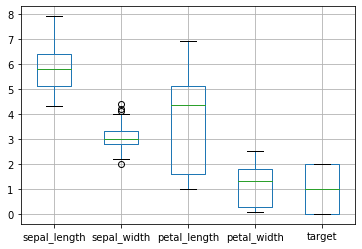

In [8]:
df.boxplot()

Outliers found in sepal width

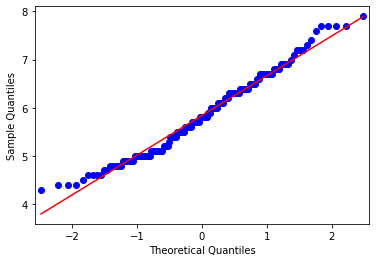

In [10]:
import statsmodels.api as sm
sm.qqplot(df.sepal_length,line='s')
plt.show()

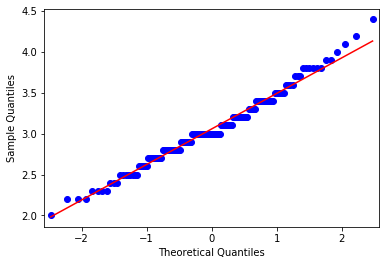

In [11]:
sm.qqplot(df.sepal_width,line='s')
plt.show()

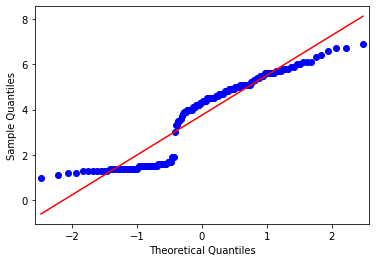

In [12]:
sm.qqplot(df.petal_length,line='s')
plt.show()

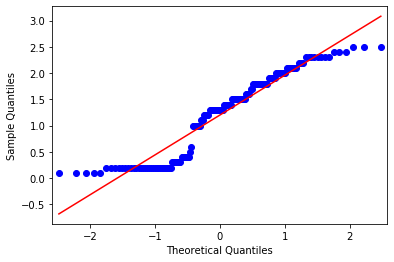

In [13]:
sm.qqplot(df.petal_width,line='s')
plt.show()

Summary - <br>
Sepal Length - Mean sepal length is 5.84. With low standard deviation of 0.83, the sepal lengths do not vary a lot and have a slightly positively skewed distribution. <br>
Sepal width - have a normal distribution with small range as the distribution is very tightly packed but has some outliers. <br>
Petal Length - has higher range of values and higher median than sepal length and sepal width<br>
Both Petal Length and Petal width are positively skewed

In [82]:
df[abs(df.petal_length_Z) > 2.5]

,sepal_length,sepal_width,petal_length,petal_width,target,petal_length_Z


No absolute values of petal length are greater than 2.5

### Split the data into Training and Test sets

In [26]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[["sepal_length", "sepal_width", "petal_length", "petal_width"]],   
                                                df[["target"]], # input x=features, y=targets    
                                                test_size = 0.3) # set aside 30% for testing

### Standardization

 Trying out 3 different standardization methods -

In [27]:
# Standard scalar
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

X_train_std = std_scaler.fit_transform(xTrain)
X_test_std = std_scaler.transform(xTest)

In [28]:
Xtest_std = pd.DataFrame(X_test_std,
                     columns=xTrain.columns)
Xtrain_std = pd.DataFrame(X_train_std,
                     columns=xTrain.columns)


In [76]:
Xtest_std.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,0.331638,-0.091513,0.278985,0.240201
std,1.242695,0.933041,0.977017,0.941431
min,-1.665698,-2.408651,-1.367550,-1.354683
25%,-1.008680,-0.606989,-0.176144,-0.186640
50%,0.436761,-0.156573,0.504659,0.462273
75%,1.225183,0.293843,0.845061,0.851621
max,2.802027,2.996337,1.866265,1.630317


In [77]:
xTest.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,6.020000,3.028889,4.102222,1.328889
std,0.945708,0.414302,1.722114,0.725391
min,4.500000,2.000000,1.200000,0.100000
25%,5.000000,2.800000,3.300000,1.000000
50%,6.100000,3.000000,4.500000,1.500000
75%,6.700000,3.200000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.400000


Applying the scalar transformations to Iris data, normalizes the values to lie between 0 and 1 and bring the features to the same scale for modelling and comparison. 

In [78]:
# MinMax scalar
from sklearn import preprocessing
df_minmax = preprocessing.MinMaxScaler().fit_transform(xTrain)
minmax_df = pd.DataFrame(df_minmax)

In [79]:
minmax_df.describe()

,0,1,2,3
count,105.000000,105.000000,105.000000,105.000000
mean,0.444733,0.434762,0.466156,0.434921
std,0.231716,0.223082,0.316264,0.322589
min,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.300000,0.089286,0.083333
50%,0.424242,0.400000,0.571429,0.500000
75%,0.636364,0.600000,0.732143,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [18]:
# Max-Abs Scaling
from sklearn.preprocessing import MaxAbsScaler
X_train_max = MaxAbsScaler().fit_transform(xTrain)
maxscaler = MaxAbsScaler()

In [80]:
# Z score
from scipy.stats import zscore
df['petal_length_Z'] = zscore(df.petal_length)

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,petal_length_Z
0,5.1,3.5,1.4,0.2,0.0,-1.340227
1,4.9,3.0,1.4,0.2,0.0,-1.340227
2,4.7,3.2,1.3,0.2,0.0,-1.397064
3,4.6,3.1,1.5,0.2,0.0,-1.283389
4,5.0,3.6,1.4,0.2,0.0,-1.340227


Checking outliers with DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN()

clusters = dbs.fit_predict(xTrain)

In [20]:
xTrain['clusters'] = clusters
xTrain.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
28,5.2,3.4,1.4,0.2,0
126,6.2,2.8,4.8,1.8,1
2,4.7,3.2,1.3,0.2,0
80,5.5,2.4,3.8,1.1,1
34,4.9,3.1,1.5,0.2,0


In [21]:
xTrain.clusters.value_counts()

 1    43
 0    30
-1    21
 2     6
 3     5
Name: clusters, dtype: int64

There are 21 outlier values in the cluster -1.

## Naive Bayes Classification
Use the information contained in this dataset to predict which class of Iris a novel data point belongs to? 

Naive Bayes is a simple generative model that works by assuming that data was drawn from a Guassian distribution. NB is a fast and easy to implement algorithm that has no parameters to set, so it works great as a baseline model for classification. 

In [29]:
# choose model class
from sklearn.naive_bayes import GaussianNB 

# instantiate model
NB = GaussianNB()    

# fit model to data
NB.fit(xTrain, yTrain)  

#  make predictions on new (test) data
y_preds = NB.predict(xTest)             

## Evaluate Model

For the simple Bayesian model, measure the percentage of correct predictions when compared to ground truth: 

In [30]:
from sklearn import metrics
metrics.accuracy_score(yTest, y_preds)

0.9777777777777777

#### Cross Validation

For testing using a different selection of training vs testing data, using 5-folds cross-validation to try different random selections of training/test split: 

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB, xTrain, yTrain, cv=5)

In [33]:
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean Accuracy: 0.93 (+/- 0.10)


Implementing other models to see if they improve the results. 

## Multiple Linear Regression
After establishing a baseline with NB, trying out another model to see if it improves results. 

In [34]:
from sklearn import linear_model

# instantiate the model object
lm = linear_model.LinearRegression()

# fit the model to the dataset
lm_model = lm.fit(xTrain, yTrain)

In [35]:
# make predictions
linear_preds = lm.predict(xTest)
print(linear_preds)

[[-0.11546599]
 [ 1.24463876]
 [-0.04634483]
 [ 1.14055536]
 [-0.16314888]
 [ 1.15160233]
 [ 1.28475947]
 [ 1.01335055]
 [ 0.97649252]
 [ 1.71271074]
 [ 1.66776046]
 [ 0.94487562]
 [ 0.02193832]
 [ 1.74348964]
 [ 1.9620572 ]
 [-0.09529931]
 [ 1.23537024]
 [-0.01054575]
 [ 0.02290195]
 [ 1.26096036]
 [ 2.02637911]
 [-0.08106412]
 [ 0.00981154]
 [ 2.0301927 ]
 [ 1.74199711]
 [ 1.44574078]
 [ 1.20914645]
 [ 1.31267895]
 [-0.10221528]
 [ 1.65357762]
 [ 1.71609075]
 [ 0.1524058 ]
 [ 1.81528907]
 [ 1.87878669]
 [ 2.17189768]
 [ 0.85289813]
 [ 1.18312276]
 [ 1.98848416]
 [ 1.77813564]
 [ 1.69962033]
 [ 2.2358593 ]
 [ 1.69686569]
 [ 1.39272975]
 [ 1.96584877]
 [ 1.98142883]]


Coercing these results into a dataframe and compare them with the ground truth: 

In [36]:
df = pd.DataFrame(yTest)

In [37]:
df["preds"] = linear_preds

In [38]:
df.head()

,target,preds
35,0.0,-0.115466
76,1.0,1.244639
20,0.0,-0.046345
97,1.0,1.140555
36,0.0,-0.163149


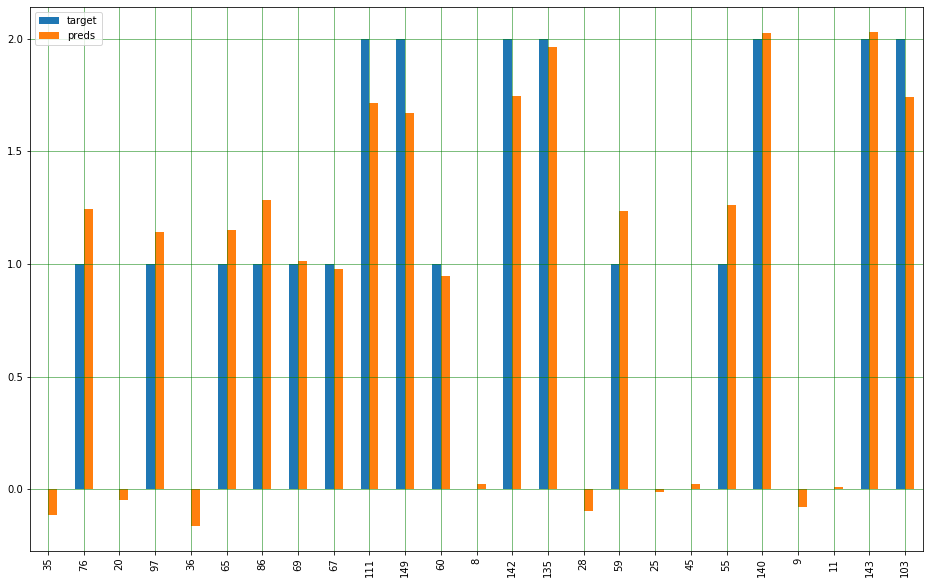

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluate the model -

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df.target, df.preds))  
print('Mean Squared Error:', metrics.mean_squared_error(df.target, df.preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df.target, df.preds)))

Mean Absolute Error: 0.16649412863652358
Mean Squared Error: 0.04350275023883309
Root Mean Squared Error: 0.20857312923488752


In [43]:
metrics.r2_score (df.target, df.preds)

0.9329580903853599

Linear Regression model explains 93% of variation in Iris class.

Both Multilple Linear regression and Naive Bayes give good prediction. 